## Supervised Learning - Multivariate Linear Regression

In [28]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [39]:
# Load the dataset

df = pd.read_csv('docs/mpg.csv')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
# Print Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [31]:
# Drop rows with missing values and select some features

# Replace "?" for NaN
df = df.replace('?', np.nan)

df = df.dropna()

features = ['horsepower', 'weight', 'displacement', 'acceleration', 'cylinders']

target = 'mpg'

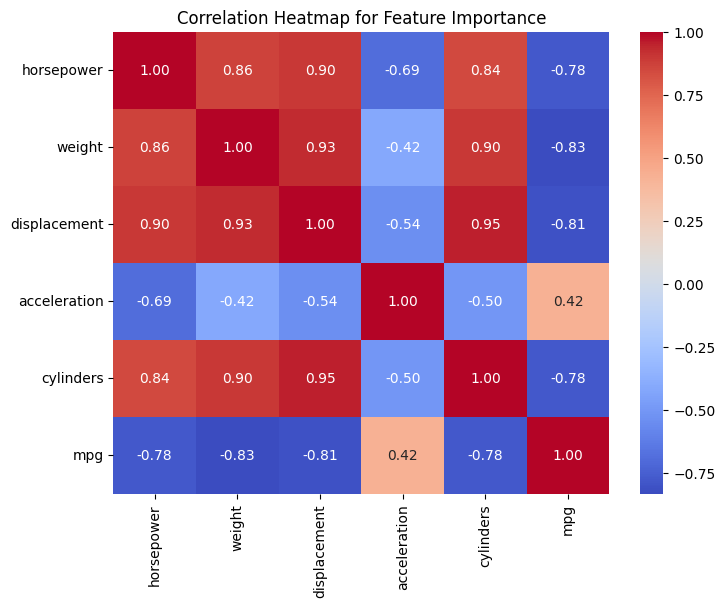

In [32]:
# Calculate correlation matrix

correlation_matrix = df[features + [target]].corr()

# Plot heatmap of feature importance

plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap for Feature Importance')

plt.show()

In [33]:
# Select features from the correlation matrix and use mpg as the target variable

X = df[['horsepower', 'weight', 'displacement', 'cylinders']].values

y = df['mpg'].values

In [34]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [35]:
# Create a Linear Regression model

model = LinearRegression()

# Train the model

model.fit (X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [38]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f} ")

Mean Squared Error: 17.89 


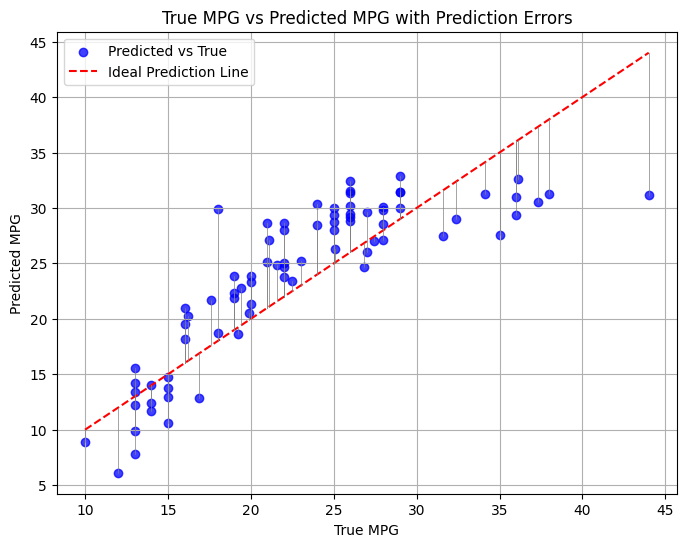

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [42]:
# Plot the true vs predicted mpg

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted vs True')

plt.plot([min(y_test), max(y_test) ], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

# Calculate and plot prediction errors

for (true_value, predicted_value) in zip(y_test, y_pred):

    plt.plot([true_value, true_value], [true_value, predicted_value], color='gray', linestyle='-', linewidth=0.5)

plt.xlabel("True MPG")

plt.ylabel("Predicted MPG")

plt.title("True MPG vs Predicted MPG with Prediction Errors")

plt.legend()

plt.grid(True)

plt.show()

df.info()